(256, 100)


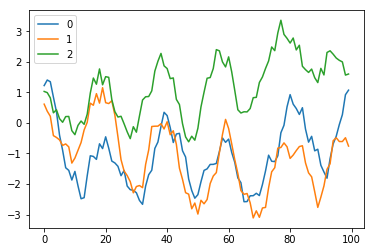

In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

batch_size = 256
f = 5
timesteps = 100
def generate_batch():
    batch_x = []
    batch_y = []
    for i in range(batch_size):
        phase = np.random.uniform(-0.5, 0.5, 1)
        x = np.linspace(0, 1, timesteps) + phase
        y = np.sin(2*np.pi*x*f) * 1
        y = y + np.random.uniform(-0.5, 0.5, timesteps).cumsum()
        batch_x.append(x)
        batch_y.append(y)
#     batch_x = np.asarray(batch_x)    
    batch_y = np.asarray(batch_y)
    return batch_y

batch_y = generate_batch()

# plt.plot(np.arange(0, 1000, 1), batch_y[0])
# plt.xlabel('time')
# plt.ylabel('value')
# plt.show()
print(batch_y.shape)
df = pd.DataFrame(batch_y)
df.iloc[0:3].T.plot()

In [9]:
df.head()
print(df.shape)

(256, 1000)


In [10]:
df = df.T

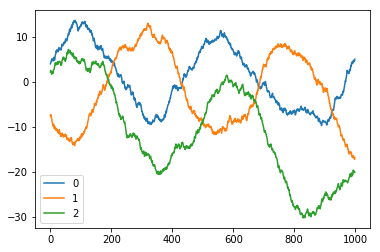

In [12]:
df.iloc[:,0:3].plot()

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,3.990059,-7.379599,2.228516,-2.271502,-4.643566,1.579045,10.343276,7.768807,-9.479024,6.105806,...,6.166512,9.951349,-8.959351,6.426353,-9.434987,8.998783,-2.444909,-1.244176,10.062569,-9.799611
1,4.169017,-7.719724,2.504278,-2.745541,-4.984411,1.290380,10.681214,7.799704,-9.591504,6.138434,...,6.061092,9.742319,-9.123933,6.401796,-9.221576,8.931166,-2.810903,-1.154041,10.077430,-9.638365
2,4.407707,-7.367775,2.274018,-2.897186,-5.066590,1.634645,10.362939,7.591321,-9.622021,5.953199,...,6.230250,10.239664,-9.289532,6.744194,-8.973985,8.925159,-2.593273,-1.252323,10.090388,-9.688118
3,4.672994,-7.910710,2.010936,-3.172517,-4.739971,1.737755,10.440737,7.310611,-9.504687,6.244583,...,6.608635,9.825590,-9.172825,6.665000,-9.277152,8.559288,-2.542225,-0.946386,9.755449,-9.640573
4,5.010813,-8.254072,1.688388,-2.834244,-5.107993,1.553855,10.482542,7.529648,-9.885636,5.772003,...,6.442699,10.279722,-9.153642,6.791177,-9.662214,8.672913,-2.122472,-0.800645,10.052099,-9.588057


In [13]:
((df.shift(-1) - df) / df.abs()).head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,0.044851,-0.046090,0.123743,-0.208690,-0.073402,-0.182810,0.032672,0.003977,-0.011866,0.005344,...,-0.017095,-0.021005,-0.018370,-0.003821,0.022619,-0.007514,-0.149696,0.072445,0.001477,0.016454
1,0.057253,0.045591,-0.091947,-0.055233,-0.016487,0.266793,-0.029798,-0.026717,-0.003182,-0.030176,...,0.027909,0.051050,-0.018150,0.053485,0.026849,-0.000673,0.077423,-0.085163,0.001286,-0.005162
2,0.060187,-0.073691,-0.115690,-0.095034,0.064465,0.063078,0.007507,-0.036978,0.012194,0.048946,...,0.060734,-0.040438,0.012563,-0.011743,-0.033783,-0.040993,0.019685,0.244296,-0.033194,0.004908
3,0.072292,-0.043405,-0.160397,0.106626,-0.077642,-0.105826,0.004004,0.029961,-0.040080,-0.075678,...,-0.025109,0.046219,0.002091,0.018931,-0.041506,0.013275,0.165112,0.153997,0.030409,0.005447
4,-0.057914,-0.055755,0.319903,0.090252,-0.014773,-0.094842,0.013872,0.011081,-0.021889,0.053740,...,0.050878,-0.022084,-0.053808,-0.058825,-0.039005,0.007002,0.226943,-0.454753,-0.022285,-0.026694


In [12]:
from __future__ import print_function, division
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import pandas as pd
from game import Game

num_periods = 15
f_horizon = 1

num_input = 1
state_size = 50
num_classes = 3
output = 1
dropout = 0.5
num_layers = 2

num_epochs = 50
batch_size = 32
num_batches = 300
learning_rate = 0.001

random.seed(111)

# onehot = np.identity(3)
def generate_batch(batch_size, num_periods, f_horizon):
    x_batches = np.random.uniform(-10, 10, size=[batch_size, num_periods]).cumsum(axis=1).reshape([-1, num_periods, 1])
    y_batches = np.random.choice(num_classes, batch_size)
    return x_batches, y_batches


x, y = generate_batch(batch_size, num_periods, f_horizon)

print('X-shape: {}'.format(x.shape))
print('Y-shape: {}'.format(y.shape))


/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


X-shape: (32, 15, 1)
Y-shape: (32,)


In [3]:
# Create model
def create_model(batchX, batchY, advantage):
    conv1 = tf.layers.conv1d(inputs=batchX, data_format='channels_last', filters=18, kernel_size=2, strides=1, padding='same', activation = tf.nn.tanh)
    conv2 = tf.layers.conv1d(inputs=conv1, data_format='channels_last', filters=36, kernel_size=2, strides=1, padding='same', activation = tf.nn.tanh)
    flat = tf.reshape(conv2, (-1, 36*num_periods))
    logits = tf.layers.dense(flat, 3)

    outputs = tf.multinomial(logits, 1)
    logprob = -tf.nn.sparse_softmax_cross_entropy_with_logits(labels=batchY, logits=logits)
    loss = -tf.reduce_mean(logprob * advantage)
    return loss, outputs, logits


# Define placeholders
batchX_placeholder = tf.placeholder(tf.float32, [batch_size, num_periods, num_input], name='PL_X')
batchY_placeholder = tf.placeholder(tf.int32, [batch_size], name='PL_Y')
advantage_placeholder = tf.placeholder(tf.float32, [batch_size], name='PL_ADV')

# Build model
loss, outputs, logits = create_model(batchX_placeholder, batchY_placeholder, advantage_placeholder)

# Build training step
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_step = optimizer.minimize(loss)



Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead


In [4]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()
    
    x, y = generate_batch(batch_size, num_periods, f_horizon)
    
    _loss, _logits, _outputs = sess.run([loss, logits, outputs], feed_dict={
                    batchX_placeholder: x,
                    batchY_placeholder: y,
                    advantage_placeholder: y
                })



In [5]:
_logits.shape

(32, 3)

In [6]:
_outputs.shape

(32, 1)

In [ ]:
env = Game(batch_size, num_periods)
something = env.play(x, _outputs[0])
print(something)
print(len(something))